In [108]:
import numpy as np
import gzip
import struct

from matplotlib import pyplot as plt

In [109]:
def get_labels():
    with gzip.open("train_labels.gz", 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)
    
def get_features(filename):
    with gzip.open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)
    
def plot_image(image):
    plt.imshow(image.reshape((28,28)), cmap="gray")
    
labels = get_labels()
features = get_features("train_features.gz").reshape((60000, 784))
test = get_features("test_features.gz").reshape((10000, 784))

C:\Users\marco\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """
C:\Users\marco\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:11: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # This is added back by InteractiveShellApp.init_path()


In [110]:
def sigmoid(x):
    return 1 / (1 + np.exp(0 - x))

def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def squared_loss(y, x):
    return (y - x) ** 2

def d_squared_loss(y, x):
    return - 2 * (y - x)

In [111]:
def run(xs, w_1, w_2, b_1, b_2):
    """
    :param x: the matrix of input data, shape (N, D)
    """
    N = xs.shape[1]
    D = xs.shape[0]
    f1 = w_1 @ xs
    f2 = (b_1 + f1.T).T
    f3 = sigmoid(f2)
    f4 = w_2 @ f3
    f5 = (b_2 + f4.T).T
    f6 = sigmoid(f5)
    f7 = squared_loss(xs, f6)
    f8 = np.sum(f7, axis=0)
    f9 = np.sum(f8, axis=0)
    f10 = f9 / N
    
    t10 = 1
    t9 = 1 / N
    t8 = np.full((N), 1 / N)
    t7 = np.full((D, N), 1 / N)
    t6 = d_squared_loss(xs, f6) * t7
    t5 = (d_sigmoid(f5)) * t6
    t4 = t5
    tb2 = np.sum(t5, axis=1)

    t3 = w_2.T @ t4
    tw2 = (f3 @ t4.T).T

    t2 = d_sigmoid(f2) * t3

    t1 = t2
    tb1 = np.sum(t2, axis=1)
    tw1 = t1 @ xs.T
    return f6, tw1, tw2, tb1, tb2, f10

In [112]:
def adam(weight, grad, k, m_prev, v_prev, b1=0.9, b2=0.999, l=0.00000001, rate=0.007):
    m = b1 * m_prev + (1 - b1)*grad
    v = b2 * v_prev + (1 - b2)*(grad ** 2)
    
    m_hat = m / (1 - (b1 ** k))
    v_hat = v / (1 - (b2 ** k))
    weight -= (rate / (np.sqrt(v_hat) + l))*m_hat
    return (k+1, m, v)


In [113]:
w1 = np.random.normal(0, 1, (30, 784))
w2 = np.random.normal(0, 1, (784, 30))
b1 = np.random.normal(0, 1, (30))
b2 = np.random.normal(0, 1, (784))

In [114]:
features = features / 255

In [ ]:
past_epochs = []
past_loss_values = []

epochs = 100
previous_runnings = [[1,0,0] for i in range(4)]
weights = [w1,w2,b1,b2]

for i in range(epochs):
    res, grad_w1, grad_w2, grad_b1, grad_b2, loss = run(features.T, w1, w2, b1, b2)
    grads = [grad_w1, grad_w2, grad_b1, grad_b2]
    for (j, (weight, previous_running, grad)) in enumerate(zip(weights, previous_runnings, grads)):
        k, m, v = previous_running
        previous_runnings[j] = adam(weight, grad, k, m, v)
    past_epochs.append(i)
    past_loss_values.append(loss)
    print(i, loss)

0 302.34759257106776
1 293.21052193340614
2 284.2926541999929
3 275.62680039221465
4 267.2397638005156
5 259.1582375233632
6 251.4094531036399
7 244.01090988512928
8 236.963262234164
9 230.25586057147459
10 223.8717173559641
11 217.78995076828198
12 211.9862543114864
13 206.43190116243528
14 201.09538041615835
15 195.94519494487358
16 190.9516055349973
17 186.0879655361978
18 181.33158778245578
19 176.6654883651622
20 172.07773452689815
21 167.56000929047968
22 163.105864712601
23 158.70991111012728
24 154.37009331271753
25 150.08866041553074
26 145.8699012282502
27 141.71785098178313
28 137.63657140404132
29 133.6317881735162
30 129.71181708218276
31 125.88653807688861
32 122.16486986591883
33 118.55470474690418
34 115.06389241872775
35 111.69926324397818
36 108.46430366483312
37 105.3594316135646
38 102.38388883034642
39 99.53586644572799
40 96.81253342687921
41 94.21075780373302
42 91.72769524372193
43 89.3609313532869
44 87.10872907443769
45 84.96960378439351
46 82.94129289745278
4

C:\Users\marco\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


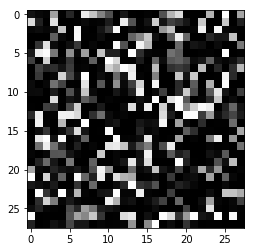

In [81]:
test = run(features.T[:,6:7], w1, w2, b1, b2)
plot_image(test[0][:,0] * 255)

In [64]:
labels[5]

2